<a href="https://colab.research.google.com/github/sanchukanirupama/Customer-Churn-Prediction---Telecom-DataSet/blob/main/customer_churn_telecom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Telecom Churn Prediction : Data Exploration**

In [101]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf # Works as a connector between the pandas library and plotly
cf.go_offline() 
from sklearn.model_selection import GridSearchCV

In [102]:
df = pd.read_csv('telecom_churn.csv')
df.head(5)

#Class - 0 -> customer retained
#Class - 1 -> cusomer has left

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
0,16,128,415,2845,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,2301,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,1616,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,2510,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,155,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          5000 non-null   int64  
 1   account_length                 5000 non-null   int64  
 2   area_code                      5000 non-null   int64  
 3   phone_number                   5000 non-null   int64  
 4   international_plan             5000 non-null   int64  
 5   voice_mail_plan                5000 non-null   int64  
 6   number_vmail_messages          5000 non-null   int64  
 7   total_day_minutes              5000 non-null   float64
 8   total_day_calls                5000 non-null   int64  
 9   total_day_charge               5000 non-null   float64
 10  total_eve_minutes              5000 non-null   float64
 11  total_eve_calls                5000 non-null   int64  
 12  total_eve_charge               5000 non-null   f

In [104]:
df.describe()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
count,5000.00000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,25.99840,100.25860,436.911400,2499.500000,0.094600,0.264600,7.755200,180.288900,100.029400,30.649668,...,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400,0.141400
std,14.80348,39.69456,42.209182,1443.520003,0.292691,0.441164,13.546393,53.894699,19.831197,9.162069,...,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363,0.348469
min,0.00000,1.00000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.00000,73.00000,408.000000,1249.750000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,...,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,26.00000,100.00000,415.000000,2499.500000,0.000000,0.000000,0.000000,180.100000,100.000000,30.620000,...,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,39.00000,127.00000,415.000000,3749.250000,0.000000,1.000000,17.000000,216.200000,113.000000,36.750000,...,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000,0.000000
max,50.00000,243.00000,510.000000,4999.000000,1.000000,1.000000,52.000000,351.500000,165.000000,59.760000,...,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


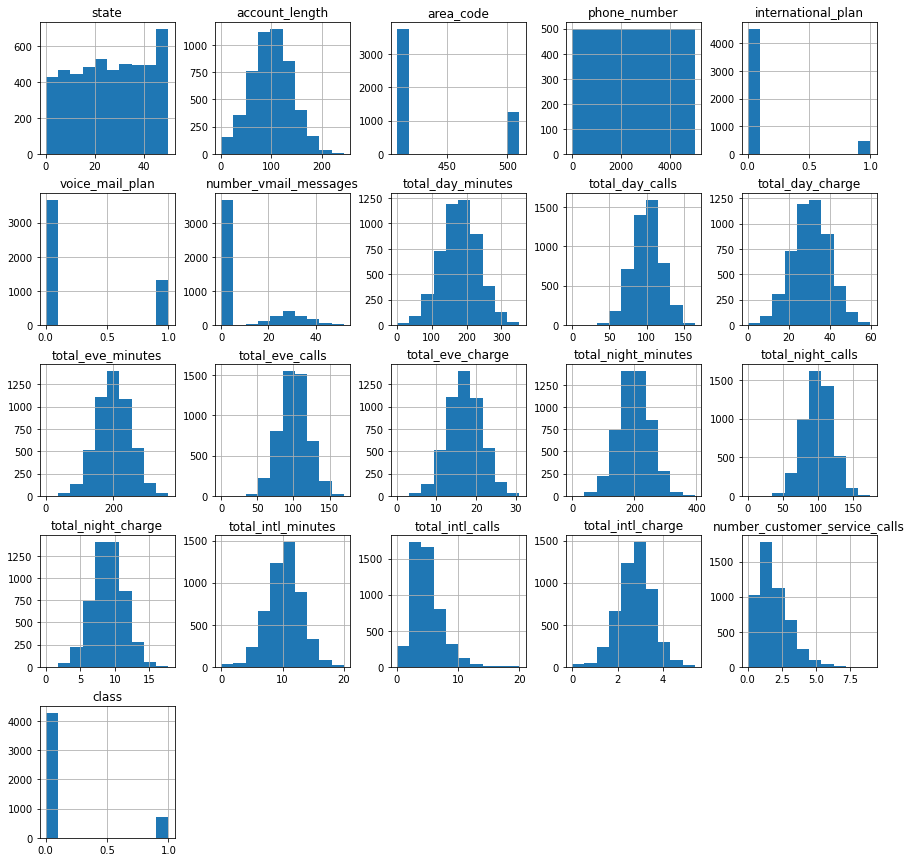

In [105]:
df.hist(figsize=(15,15))
plt.show()

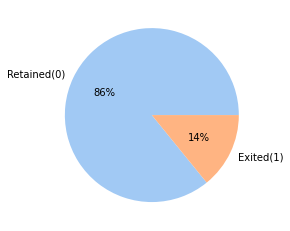

In [106]:
colors = sns.color_palette('pastel')[0:5]
plt.pie(df['class'].value_counts(), labels = ['Retained(0)', 'Exited(1)'], colors = colors, autopct='%.0f%%')
plt.show()

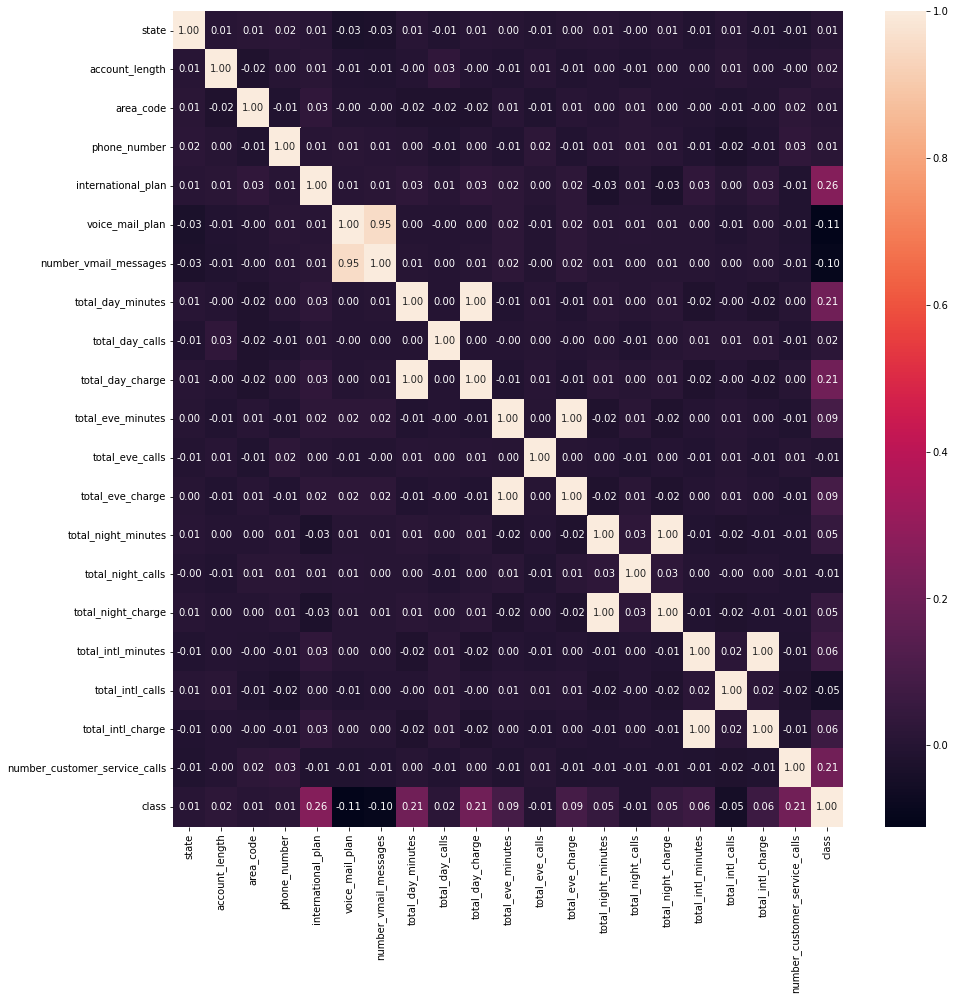

In [107]:
corr_matrix = df.corr()
plt.figure(figsize = (15,15))
sns.heatmap(corr_matrix, annot = True, fmt = '0.2f')
plt.show()

Text(0.5, 1.0, 'Distribution of day charges by churn')

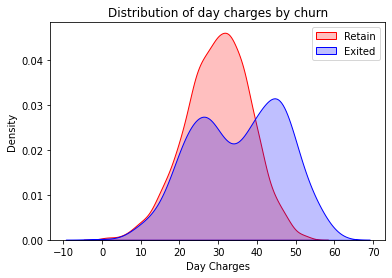

In [108]:
# Churn by day charges
ax = sns.kdeplot(df.total_day_charge[(df["class"] == 0)],
               color = "Red", shade = True)
ax = sns.kdeplot(df.total_day_charge[(df["class"] == 1)],
               color = "Blue", shade = True)

ax.legend(["Retain", "Exited"], loc = "upper right")
ax.set_ylabel("Density")
ax.set_xlabel("Day Charges")
ax.set_title("Distribution of day charges by churn")

Text(0.5, 1.0, 'Distribution of evening charges by churn')

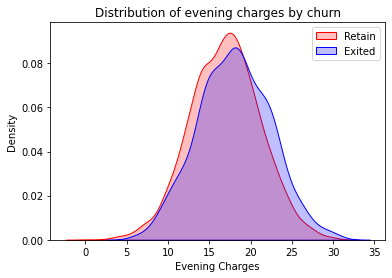

In [109]:
# Churn by evening charges
ax = sns.kdeplot(df.total_eve_charge[(df["class"] == 0)],
               color = "Red", shade = True)
ax = sns.kdeplot(df.total_eve_charge[(df["class"] == 1)],
               color = "Blue", shade = True)

ax.legend(["Retain", "Exited"], loc = "upper right")
ax.set_ylabel("Density")
ax.set_xlabel("Evening Charges")
ax.set_title("Distribution of evening charges by churn")

**Telecom Churn Prediction : Data Preprocessing**

In [110]:
X = df.drop(['class', 'area_code', 'phone_number'], axis='columns')
Y = df['class']

In [111]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

**Telecom Churn Prediction : Feature Selection**

In [112]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(x_train,y_train)


RandomForestClassifier()

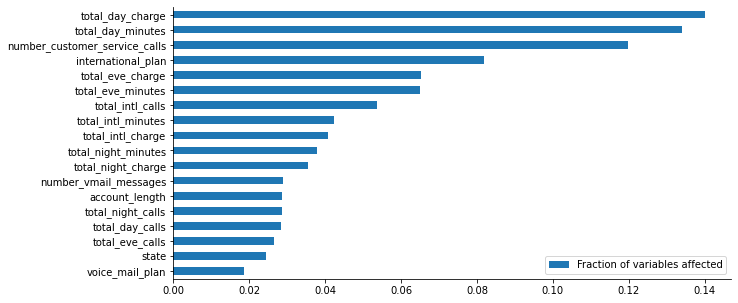

In [113]:
# Plot the feature importance
feature_scores= pd.DataFrame({"Fraction of variables affected" : RF.feature_importances_},index = X.columns)
feature_scores= feature_scores.sort_values(by = "Fraction of variables affected")
feature_scores.plot(kind = "barh", figsize = (10, 5))
sns.despine()

**Telecom Churn Prediction : Model Evaluation**

**- Logistic Regression**

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

Grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
LR_Model = LogisticRegression()
LR_Model_CV=GridSearchCV(LR_Model,Grid,cv=10)

LR_Model_CV.fit(x_train, y_train)

print("tuned hpyerparameters :(best parameters) ",LR_Model_CV.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/lin

tuned hpyerparameters :(best parameters)  {'C': 0.001, 'penalty': 'l2'}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [121]:
LR_Model = LogisticRegression(C=0.001, penalty="l2")
LR_Model.fit(x_train, y_train)


y_pred = LR_Model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       840
           1       0.60      0.04      0.07       160

    accuracy                           0.84      1000
   macro avg       0.72      0.52      0.49      1000
weighted avg       0.81      0.84      0.78      1000



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



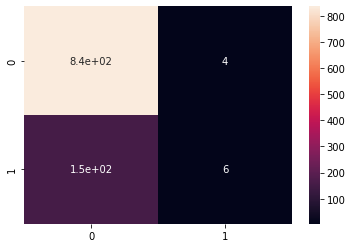

In [122]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

**Telecom Churn Prediction : Model Evaluation**

**- Support Vector Machine**

In [125]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC

SVM_Model = LinearSVC(max_iter = 10000)
SVM_Model = CalibratedClassifierCV()
SVM_Model.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



CalibratedClassifierCV()

In [126]:
y_pred = SVM_Model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       840
           1       0.92      0.07      0.13       160

    accuracy                           0.85      1000
   macro avg       0.88      0.53      0.52      1000
weighted avg       0.86      0.85      0.79      1000



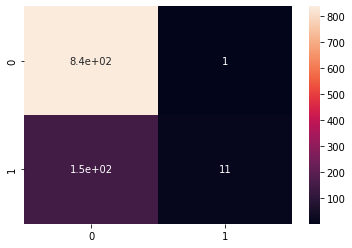

In [127]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

**Telecom Churn Prediction : Model Evaluation**

**- Random Forest Classifier**

In [128]:
from sklearn.ensemble import RandomForestClassifier

RF_Model = RandomForestClassifier()
RF_Model.fit(x_train, y_train)

RandomForestClassifier()

In [129]:
y_pred = RF_Model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       840
           1       0.97      0.72      0.82       160

    accuracy                           0.95      1000
   macro avg       0.96      0.86      0.90      1000
weighted avg       0.95      0.95      0.95      1000



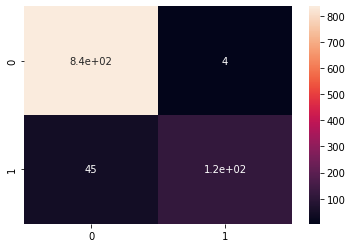

In [130]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

**Telecom Churn Prediction : Model Evaluation**

**- K-Nearest Neighbour**

In [131]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(KNN, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(x_train, y_train)

print(grid_search.best_params_)

Fitting 10 folds for each of 30 candidates, totalling 300 fits
{'n_neighbors': 6}


In [132]:
KNN_Model = KNeighborsClassifier(n_neighbors=6)
KNN_Model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [133]:
y_pred = KNN_Model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       840
           1       0.85      0.24      0.38       160

    accuracy                           0.87      1000
   macro avg       0.86      0.62      0.65      1000
weighted avg       0.87      0.87      0.84      1000



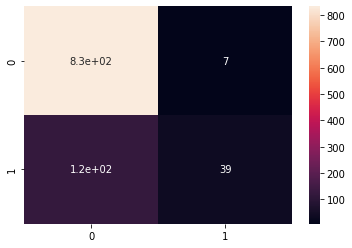

In [134]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

**Telecom Churn Prediction : Model Evaluation**

**- Naive Bayes Classifier**

In [135]:
from sklearn.naive_bayes import GaussianNB

GNB_Model = GaussianNB()
GNB_Model.fit(x_train, y_train)

GaussianNB()

In [136]:
y_pred = GNB_Model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       840
           1       0.65      0.55      0.59       160

    accuracy                           0.88      1000
   macro avg       0.78      0.75      0.76      1000
weighted avg       0.87      0.88      0.88      1000



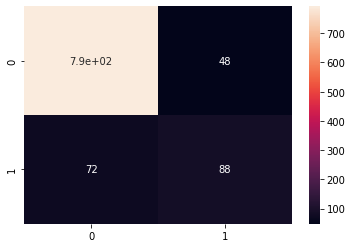

In [137]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

**Comparing Models**

In [138]:
# ROC curve
from sklearn.metrics import roc_curve

fpr1, tpr1, thresh1 = roc_curve(y_test, LR_Model.predict_proba(x_test)[:, 1], pos_label = 1)
fpr2, tpr2, thresh2 = roc_curve(y_test, SVM_Model.predict_proba(x_test)[:, 1], pos_label = 1)
fpr3, tpr3, thresh3 = roc_curve(y_test, RF_Model.predict_proba(x_test)[:, 1], pos_label = 1)
fpr4, tpr4, thresh4 = roc_curve(y_test, KNN_Model.predict_proba(x_test)[:, 1], pos_label = 1)
fpr5, tpr5, thresh5 = roc_curve(y_test, GNB_Model.predict_proba(x_test)[:, 1], pos_label = 1)

In [139]:
# AUC score
from sklearn.metrics import roc_auc_score

auc_score1 = roc_auc_score(y_test, LR_Model.predict_proba(x_test)[:, 1])
auc_score2 = roc_auc_score(y_test, SVM_Model.predict_proba(x_test)[:, 1])
auc_score3 = roc_auc_score(y_test, RF_Model.predict_proba(x_test)[:, 1])
auc_score4 = roc_auc_score(y_test, KNN_Model.predict_proba(x_test)[:, 1])
auc_score5 = roc_auc_score(y_test, GNB_Model.predict_proba(x_test)[:, 1])

print("Logistic Regression: ", auc_score1) # Logistic Regression
print("Support Vector Machine: ", auc_score2) # Support Vector Machine
print("Random Forest: ", auc_score3) # Random Forest
print("K-Nearest Neighbors: ", auc_score4) # K-Nearest Neighbors
print("Naive Bayes: ", auc_score5) # Naive Bayes

Logistic Regression:  0.6978497023809523
Support Vector Machine:  0.7643154761904761
Random Forest:  0.9029873511904761
K-Nearest Neighbors:  0.6858221726190477
Naive Bayes:  0.8384598214285713


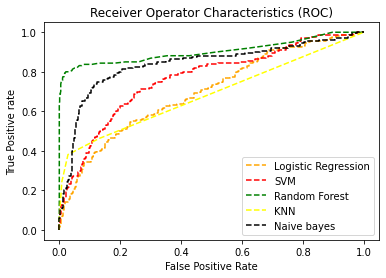

In [141]:
plt.plot(fpr1, tpr1, linestyle = "--", color = "orange", label = "Logistic Regression")
plt.plot(fpr2, tpr2, linestyle = "--", color = "red", label = "SVM")
plt.plot(fpr3, tpr3, linestyle = "--", color = "green", label = "Random Forest")
plt.plot(fpr4, tpr4, linestyle = "--", color = "yellow", label = "KNN")
plt.plot(fpr5, tpr5, linestyle = "--", color = "black", label = "Naive bayes")

plt.title('Receiver Operator Characteristics (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc = 'best')
plt.savefig('ROC', dpi = 300)
plt.show()